In [2]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

base_dir = r"C:\Users\romul\OneDrive\Área de Trabalho\trabalho cmovel\**\*.cwnd"
data = {}

files = glob.glob(base_dir, recursive=True)
for file in files:
    parent_directory = os.path.basename(os.path.dirname(file))
    if parent_directory not in data:
        data[parent_directory] = {}
    file_name = os.path.basename(file)
    data[parent_directory][file_name] = {}
    with open(file) as cwdn_file:
        data[parent_directory][file_name]["col1"] = []
        data[parent_directory][file_name]["col2"] = []
        data[parent_directory][file_name]["col3"] = []
        for line in cwdn_file:
            parts = line.strip().split('\t')
            if(len(parts) == 3):
                data[parent_directory][file_name]["col1"].append(float(parts[0]))
                data[parent_directory][file_name]["col2"].append(float(parts[1]))
                data[parent_directory][file_name]["col3"].append(float(parts[2]))

In [20]:
print (data['TcpBbr']['fluxo10.cwnd']['col1'])

[31.0218, 31.0418, 31.0436, 31.0447, 31.0461, 31.0531, 31.066, 31.0684, 31.1575, 31.1645, 31.3912, 31.4331, 31.4571, 31.608, 31.617, 31.624, 31.63, 31.6576, 31.7778, 31.8125, 31.8137, 31.835, 32.0032, 32.0259, 32.0862, 32.0862, 32.0862, 32.1322, 32.1427, 32.1432, 32.1544, 32.1559, 32.166, 32.166, 32.1743, 32.1753, 32.1861, 32.1965, 32.2069, 32.2079, 32.217, 32.2265, 32.3302, 32.3504, 32.369, 32.4045, 32.4093, 32.4278, 32.4446, 32.6064, 32.6335, 32.6774, 32.692, 32.7435, 32.8186, 32.8429, 32.8865, 32.8884, 33.0145, 33.0182, 33.0398, 33.0962, 33.2163, 33.2229, 33.2529, 33.4484, 33.5333, 33.6118, 33.6229, 33.634, 33.7598, 33.7598, 33.7598, 33.8108, 33.8212, 33.8217, 33.8218, 33.8293, 33.8293, 33.8293, 33.8303, 33.8421, 33.8525, 33.8603, 33.8637, 33.8731, 34.0102, 34.0397, 34.0407, 34.2179, 34.2414, 34.339, 34.4145, 34.4391, 34.5457, 34.591, 34.591, 34.591, 34.6125, 34.6244, 34.6249, 34.6538, 34.6538, 34.6634, 34.6719, 34.6815, 34.6825, 34.6916, 34.7029, 34.8131, 34.8439, 35.0171, 35.0286,

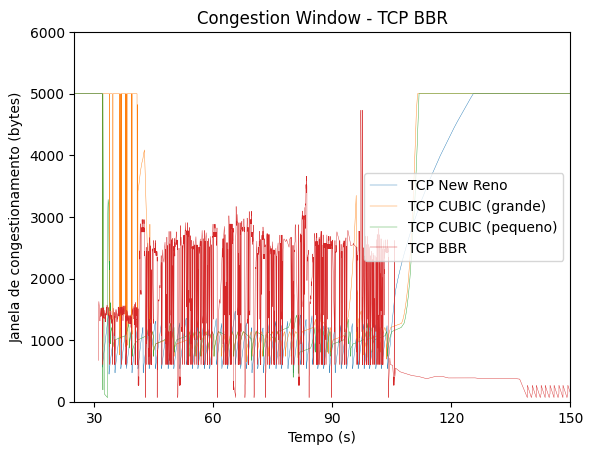

In [121]:
y07_capped = np.clip(data['TcpBbr']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpBbr']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpBbr']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpBbr']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpBbr']['fluxo07.cwnd']['col1'],
#         data['TcpBbr']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpBbr']['fluxo08.cwnd']['col1'],
#         data['TcpBbr']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpBbr']['fluxo09.cwnd']['col1'],
#         data['TcpBbr']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpBbr']['fluxo10.cwnd']['col1'],
#         data['TcpBbr']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP BBR",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=150)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='center right')
plt.title('Congestion Window - TCP BBR')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_bbr.png', dpi=300)


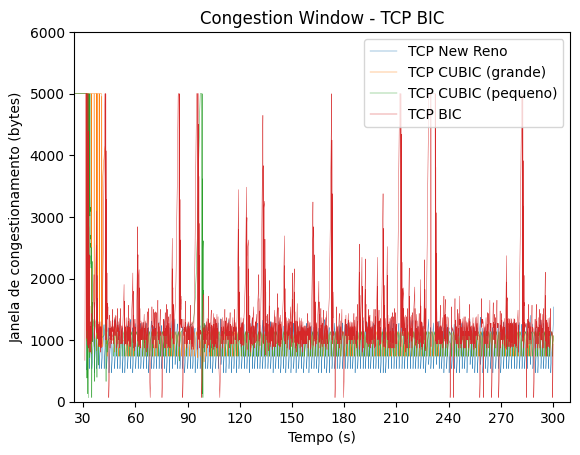

In [120]:
y07_capped = np.clip(data['TcpBic']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpBic']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpBic']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpBic']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpBic']['fluxo07.cwnd']['col1'],
#         data['TcpBic']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpBic']['fluxo08.cwnd']['col1'],
#         data['TcpBic']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpBic']['fluxo09.cwnd']['col1'],
#         data['TcpBic']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpBic']['fluxo10.cwnd']['col1'],
#         data['TcpBic']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP BIC",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=310)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP BIC')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_bic.png', dpi=300)


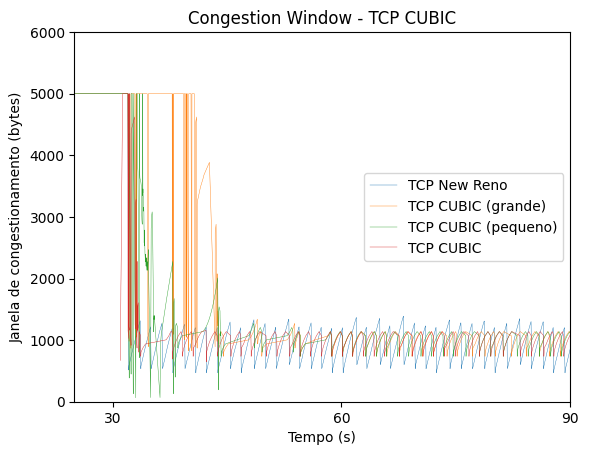

In [119]:
y07_capped = np.clip(data['TcpCubic']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpCubic']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpCubic']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpCubic']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpCubic']['fluxo07.cwnd']['col1'],
#         data['TcpCubic']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpCubic']['fluxo08.cwnd']['col1'],
#         data['TcpCubic']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpCubic']['fluxo09.cwnd']['col1'],
#         data['TcpCubic']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpCubic']['fluxo10.cwnd']['col1'],
#         data['TcpCubic']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP CUBIC",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=90)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='center right')
plt.title('Congestion Window - TCP CUBIC')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_cubic.png', dpi=300)


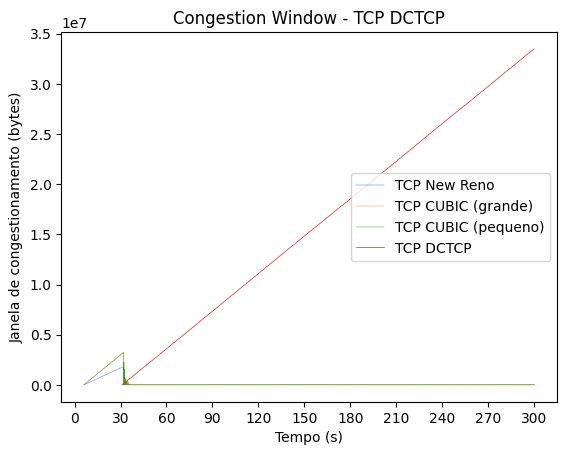

In [ ]:
y07_capped = np.clip(data['TcpDctp']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpDctp']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpDctp']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpDctp']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpDctp']['fluxo07.cwnd']['col1'],
#         data['TcpDctp']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpDctp']['fluxo08.cwnd']['col1'],
#         data['TcpDctp']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpDctp']['fluxo09.cwnd']['col1'],
#         data['TcpDctp']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpDctp']['fluxo10.cwnd']['col1'],
#         data['TcpDctp']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP DCTP",
         linewidth=0.5)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=90)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='center right')
plt.title('Congestion Window - TCP DCTP')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_dctp.png', dpi=300)


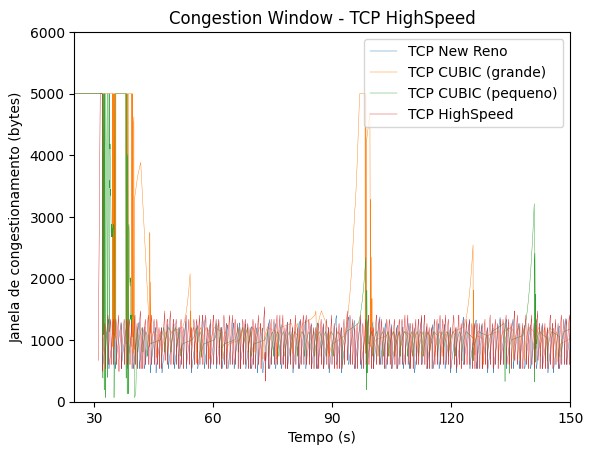

In [117]:
y07_capped = np.clip(data['TcpHighSpeed']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpHighSpeed']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpHighSpeed']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpHighSpeed']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpHighSpeed']['fluxo07.cwnd']['col1'],
#         data['TcpHighSpeed']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpHighSpeed']['fluxo08.cwnd']['col1'],
#         data['TcpHighSpeed']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpHighSpeed']['fluxo09.cwnd']['col1'],
#         data['TcpHighSpeed']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpHighSpeed']['fluxo10.cwnd']['col1'],
#         data['TcpHighSpeed']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP HighSpeed",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=150)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP HighSpeed')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_highspeed.png', dpi=300)


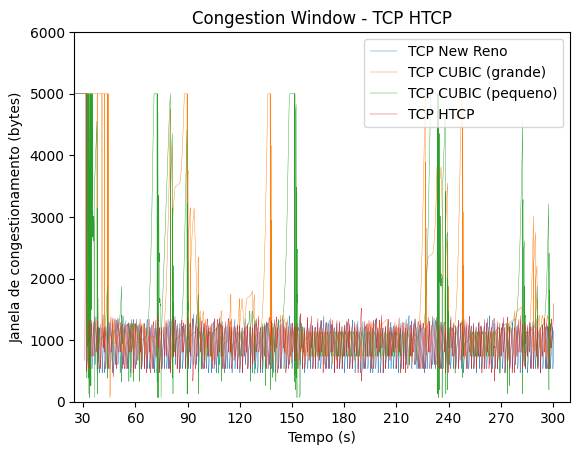

In [116]:
y07_capped = np.clip(data['TcpHtcp']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpHtcp']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpHtcp']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpHtcp']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpHtcp']['fluxo07.cwnd']['col1'],
#         data['TcpHtcp']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpHtcp']['fluxo08.cwnd']['col1'],
#         data['TcpHtcp']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpHtcp']['fluxo09.cwnd']['col1'],
#         data['TcpHtcp']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpHtcp']['fluxo10.cwnd']['col1'],
#         data['TcpHtcp']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP HTCP",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=310)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP HTCP')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_htcp.png', dpi=300)


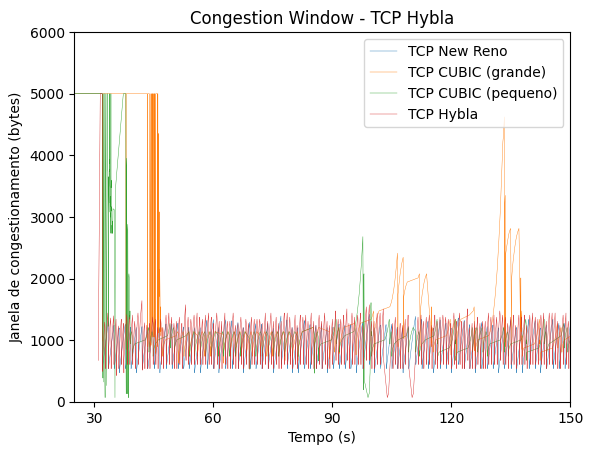

In [115]:
y07_capped = np.clip(data['TcpHybla']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpHybla']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpHybla']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpHybla']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpHybla']['fluxo07.cwnd']['col1'],
#         data['TcpHybla']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpHybla']['fluxo08.cwnd']['col1'],
#         data['TcpHybla']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpHybla']['fluxo09.cwnd']['col1'],
#         data['TcpHybla']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpHybla']['fluxo10.cwnd']['col1'],
#         data['TcpHybla']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP Hybla",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=150)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP Hybla')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_hybla.png', dpi=300)


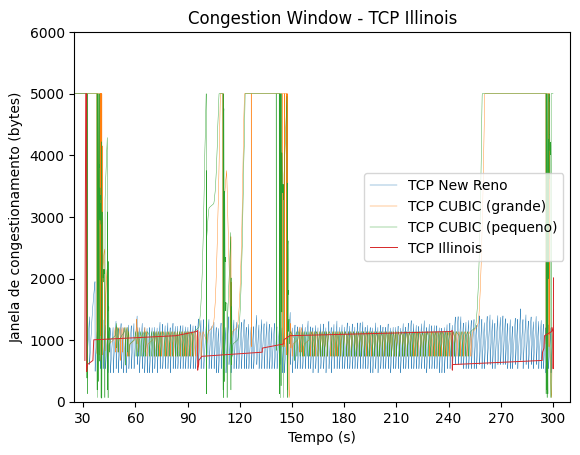

In [114]:
y07_capped = np.clip(data['TcpIllinois']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpIllinois']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpIllinois']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpIllinois']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpIllinois']['fluxo07.cwnd']['col1'],
#         data['TcpIllinois']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpIllinois']['fluxo08.cwnd']['col1'],
#         data['TcpIllinois']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpIllinois']['fluxo09.cwnd']['col1'],
#         data['TcpIllinois']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpIllinois']['fluxo10.cwnd']['col1'],
#         data['TcpIllinois']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP Illinois",
         linewidth=0.7)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=310)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='center right')
plt.title('Congestion Window - TCP Illinois')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_illinois.png', dpi=300)


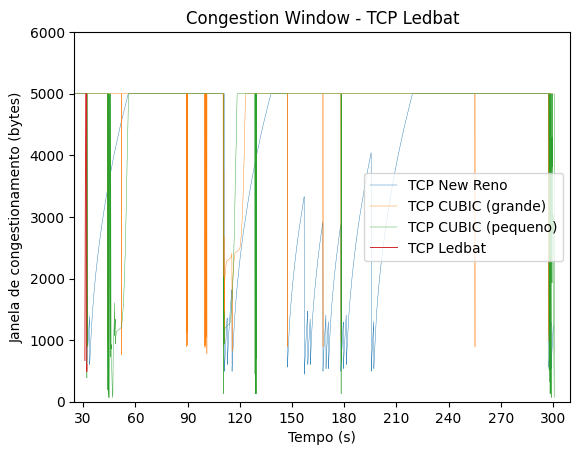

In [113]:
y07_capped = np.clip(data['TcpLedbat']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpLedbat']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpLedbat']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpLedbat']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpLedbat']['fluxo07.cwnd']['col1'],
#         data['TcpLedbat']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpLedbat']['fluxo08.cwnd']['col1'],
#         data['TcpLedbat']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpLedbat']['fluxo09.cwnd']['col1'],
#         data['TcpLedbat']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpLedbat']['fluxo10.cwnd']['col1'],
#         data['TcpLedbat']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP Ledbat",
         linewidth=0.7)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=310)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='center right')
plt.title('Congestion Window - TCP Ledbat')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_ledbat.png', dpi=300)


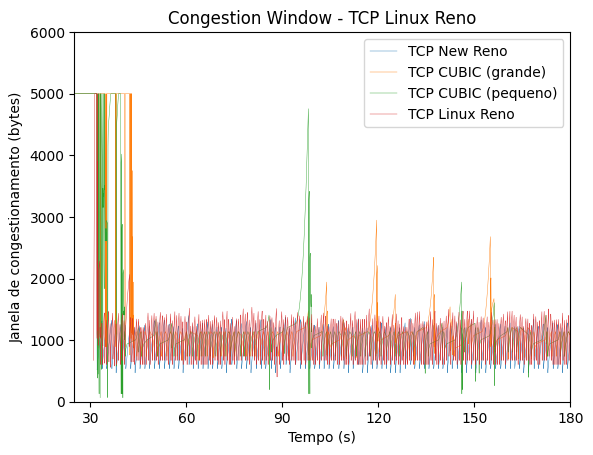

In [112]:
y07_capped = np.clip(data['TcpLinuxReno']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpLinuxReno']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpLinuxReno']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpLinuxReno']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpLinuxReno']['fluxo07.cwnd']['col1'],
#         data['TcpLinuxReno']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpLinuxReno']['fluxo08.cwnd']['col1'],
#         data['TcpLinuxReno']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpLinuxReno']['fluxo09.cwnd']['col1'],
#         data['TcpLinuxReno']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpLinuxReno']['fluxo10.cwnd']['col1'],
#         data['TcpLinuxReno']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP Linux Reno",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=180)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP Linux Reno')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_linuxreno.png', dpi=300)


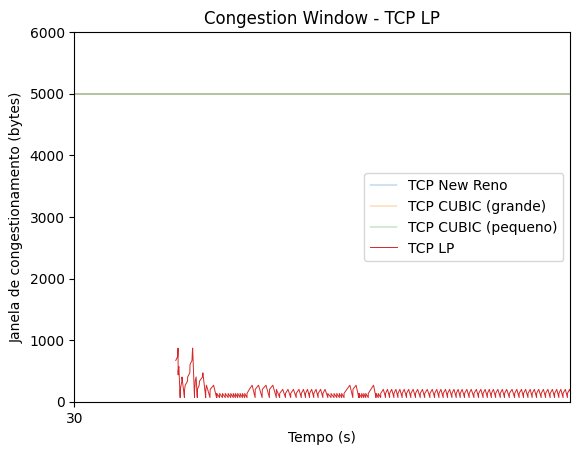

In [110]:
y07_capped = np.clip(data['TcpLp']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpLp']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpLp']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpLp']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpLp']['fluxo07.cwnd']['col1'],
#         data['TcpLp']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpLp']['fluxo08.cwnd']['col1'],
#         data['TcpLp']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpLp']['fluxo09.cwnd']['col1'],
#         data['TcpLp']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpLp']['fluxo10.cwnd']['col1'],
#         data['TcpLp']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP LP",
         linewidth=0.7)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=30, right=35)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='center right')
plt.title('Congestion Window - TCP LP')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_lp.png', dpi=300)


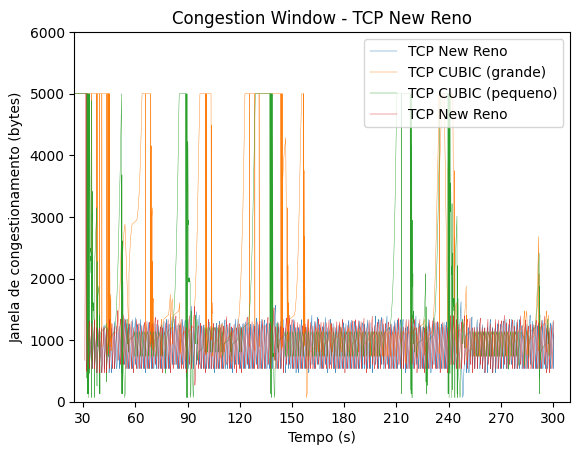

In [136]:
y07_capped = np.clip(data['TcpNewReno']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpNewReno']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpNewReno']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpNewReno']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpNewReno']['fluxo07.cwnd']['col1'],
#         data['TcpNewReno']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpNewReno']['fluxo08.cwnd']['col1'],
#         data['TcpNewReno']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpNewReno']['fluxo09.cwnd']['col1'],
#         data['TcpNewReno']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpNewReno']['fluxo10.cwnd']['col1'],
#         data['TcpNewReno']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=310)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP New Reno')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_newreno.png', dpi=300)


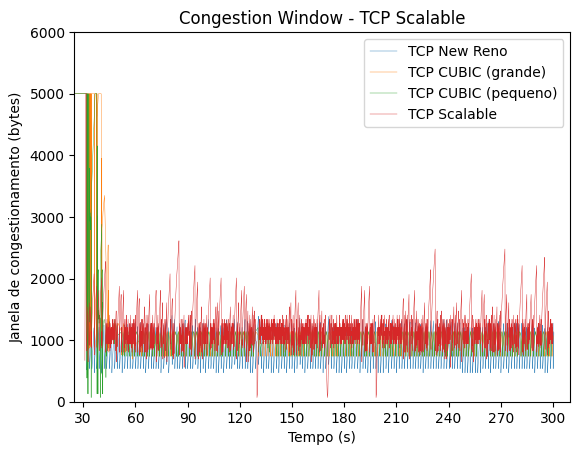

In [124]:
y07_capped = np.clip(data['TcpScalable']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpScalable']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpScalable']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpScalable']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpScalable']['fluxo07.cwnd']['col1'],
#         data['TcpScalable']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpScalable']['fluxo08.cwnd']['col1'],
#         data['TcpScalable']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpScalable']['fluxo09.cwnd']['col1'],
#         data['TcpScalable']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpScalable']['fluxo10.cwnd']['col1'],
#         data['TcpScalable']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP Scalable",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=310)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP Scalable')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_scalable.png', dpi=300)


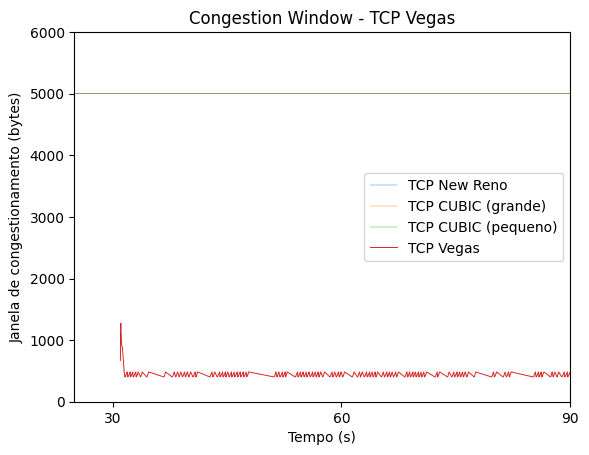

In [129]:
y07_capped = np.clip(data['TcpVegas']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpVegas']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpVegas']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpVegas']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpVegas']['fluxo07.cwnd']['col1'],
#         data['TcpVegas']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpVegas']['fluxo08.cwnd']['col1'],
#         data['TcpVegas']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpVegas']['fluxo09.cwnd']['col1'],
#         data['TcpVegas']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpVegas']['fluxo10.cwnd']['col1'],
#         data['TcpVegas']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP Vegas",
         linewidth=0.7)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=90)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='center right')
plt.title('Congestion Window - TCP Vegas')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_vegas.png', dpi=300)


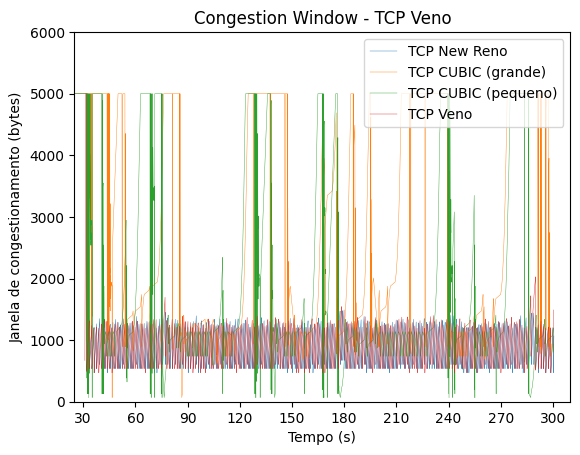

In [130]:
y07_capped = np.clip(data['TcpVeno']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpVeno']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpVeno']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpVeno']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpVeno']['fluxo07.cwnd']['col1'],
#         data['TcpVeno']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpVeno']['fluxo08.cwnd']['col1'],
#         data['TcpVeno']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpVeno']['fluxo09.cwnd']['col1'],
#         data['TcpVeno']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpVeno']['fluxo10.cwnd']['col1'],
#         data['TcpVeno']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP Veno",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=310)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP Veno')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_veno.png', dpi=300)


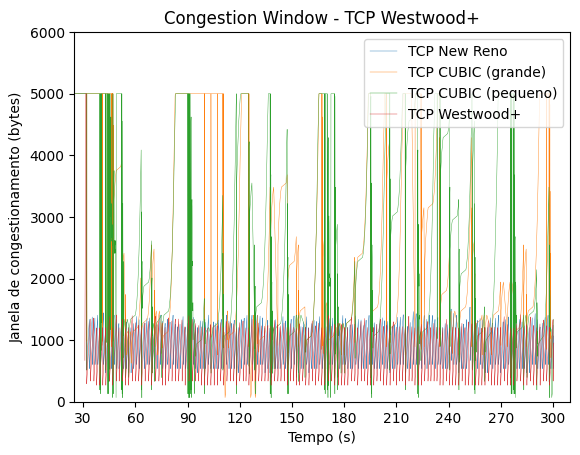

In [131]:
y07_capped = np.clip(data['TcpWestwoodPlus']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpWestwoodPlus']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpWestwoodPlus']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpWestwoodPlus']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpWestwoodPlus']['fluxo07.cwnd']['col1'],
#         data['TcpWestwoodPlus']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpWestwoodPlus']['fluxo08.cwnd']['col1'],
#         data['TcpWestwoodPlus']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpWestwoodPlus']['fluxo09.cwnd']['col1'],
#         data['TcpWestwoodPlus']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpWestwoodPlus']['fluxo10.cwnd']['col1'],
#         data['TcpWestwoodPlus']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP Westwood+",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=310)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP Westwood+')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_westwoodplus.png', dpi=300)


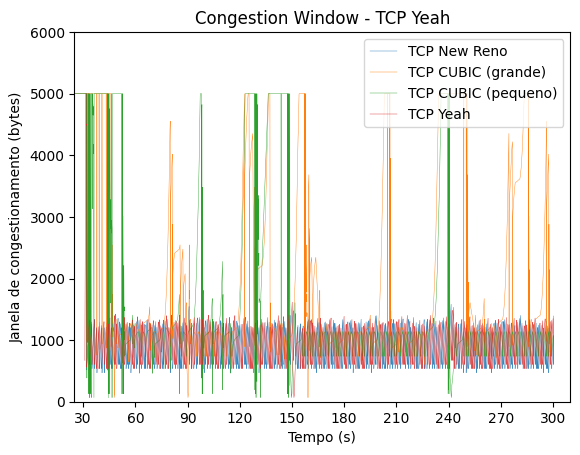

In [134]:
y07_capped = np.clip(data['TcpYeah']['fluxo07.cwnd']['col3'], None, 40000)/8
y08_capped = np.clip(data['TcpYeah']['fluxo08.cwnd']['col3'], None, 40000)/8
y09_capped = np.clip(data['TcpYeah']['fluxo09.cwnd']['col3'], None, 40000)/8
y10_capped = np.clip(data['TcpYeah']['fluxo10.cwnd']['col3'], None, 40000)/8

plt.plot(data['TcpYeah']['fluxo07.cwnd']['col1'],
#         data['TcpYeah']['fluxo07.cwnd']['col3'],
         y07_capped,
         label="TCP New Reno",
         linewidth=0.3)
plt.plot(data['TcpYeah']['fluxo08.cwnd']['col1'],
#         data['TcpYeah']['fluxo08.cwnd']['col3'],
         y08_capped,
         label="TCP CUBIC (grande)",
         linewidth=0.3)
plt.plot(data['TcpYeah']['fluxo09.cwnd']['col1'],
#         data['TcpYeah']['fluxo09.cwnd']['col3'],
         y09_capped,
         label="TCP CUBIC (pequeno)",
         linewidth=0.3)
plt.plot(data['TcpYeah']['fluxo10.cwnd']['col1'],
#         data['TcpYeah']['fluxo10.cwnd']['col3'],
         y10_capped,
         label="TCP Yeah",
         linewidth=0.3)
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], 
           labels=["0", "30", "60", "90", "120", "150", "180", "210", "240", "270", "300"])
plt.xlim(left=25, right=310)
plt.ylim(bottom=0, top=6000)
plt.legend(loc='upper right')
plt.title('Congestion Window - TCP Yeah')
plt.xlabel('Tempo (s)')
plt.ylabel('Janela de congestionamento (bytes)')
plt.savefig('tcp_yeah.png', dpi=300)
